In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
!pip install openpyxl

In [80]:
#Load data
df_inf = pd.read_csv("../csv/PCOS_infertility.csv")
df_woinf = pd.read_csv("../csv/PCOS_data.csv")

In [148]:
#Look at the data with infertile patients.
df_inf

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [82]:
#Look at the data with non-infertile patients.
df_woinf.head()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,#NAME?,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,#NAME?,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,#NAME?,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,#NAME?,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [83]:
#Look at the columns of data with non-infertile patients.
df_woinf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [84]:
#Merge the files
data = pd.merge(df_woinf,df_inf, on='Patient File No.', suffixes=tuple({'','_wo'}),how='left')
#Drop repeated features
data =data.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo',
       'II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [85]:
#Change the title of the properties
data = data.rename(columns = {"PCOS (Y/N)":"Target"})
#Look at the merged data.
data.head() 

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,#NAME?,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,#NAME?,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,#NAME?,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,#NAME?,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl. No,541.0,271.000000,156.317519,1.000,136.00,271.00,406.00,541.00
Patient File No.,541.0,271.000000,156.317519,1.000,136.00,271.00,406.00,541.00
Target,541.0,0.327172,0.469615,0.000,0.00,0.00,1.00,1.00
Age (yrs),541.0,31.430684,5.411006,20.000,28.00,31.00,35.00,48.00
Weight (Kg),541.0,59.637153,11.028287,31.000,52.00,59.00,65.00,108.00
Height(Cm),541.0,156.484835,6.033545,137.000,152.00,156.00,160.00,180.00
Blood Group,541.0,13.802218,1.840812,11.000,13.00,14.00,15.00,18.00
Pulse rate(bpm),541.0,73.247689,4.430285,13.000,72.00,72.00,74.00,82.00
RR (breaths/min),541.0,19.243993,1.688629,16.000,18.00,18.00,20.00,28.00
Hb(g/dl),541.0,11.160037,0.866904,8.500,10.50,11.00,11.70,14.80


In [87]:
#Drop unnecessary features
data = data.drop(["Sl. No","Patient File No."],axis = 1)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    object 
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [89]:
data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [90]:
data["AMH(ng/mL)"].head() 


0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [91]:
# Check unique values in the identified categorical columns
categorical_columns = ['BMI', 'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'AMH(ng/mL)']
unique_values = {col: data[col].dropna().unique()[:10] for col in categorical_columns}  # Display up to 10 unique values per column
unique_values

{'BMI': array(['19.3', '#NAME?', '25.1', '24.7', '24.1', '17.2', '19.7', '21.3',
        '16.6', '27.2'], dtype=object),
 'II    beta-HCG(mIU/mL)': array(['1.99', '494.08', '801.45', '100.51', '158.51', '1214.23', '91.55',
        '749.98', '218.65', '13'], dtype=object),
 'FSH/LH': array(['#NAME?', '7.25', '4.12', '0.513', '1.25', '1.626', '5.237',
        '4.433', '1.673', '1.286'], dtype=object),
 'Waist:Hip Ratio': array(['#NAME?', '0.795', '0.782', '0.875', '0.842', '0.777', '0.864',
        '0.941', '0.923'], dtype=object),
 'AMH(ng/mL)': array(['2.07', '1.53', '6.63', '1.22', '2.26', '6.74', '3.05', '1.54',
        '1', '1.61'], dtype=object)}

In [92]:
#Converting
data["BMI"] = pd.to_numeric(data["BMI"], errors='coerce')
data["FSH/LH"] = pd.to_numeric(data["FSH/LH"], errors='coerce')
data["Waist:Hip Ratio"] = pd.to_numeric(data["Waist:Hip Ratio"], errors='coerce')
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     242 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [94]:
colors = ['#670067','#008080']

In [95]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

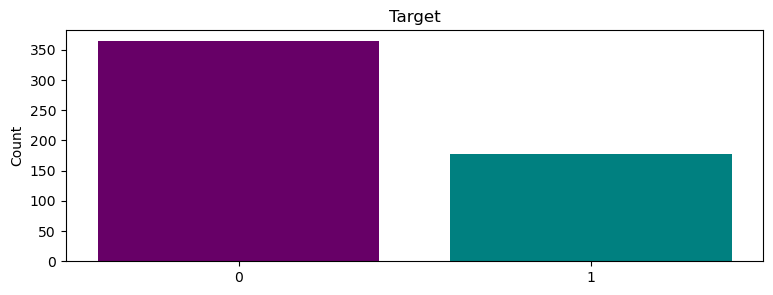

Target: 
 Target
0    364
1    177
Name: count, dtype: int64


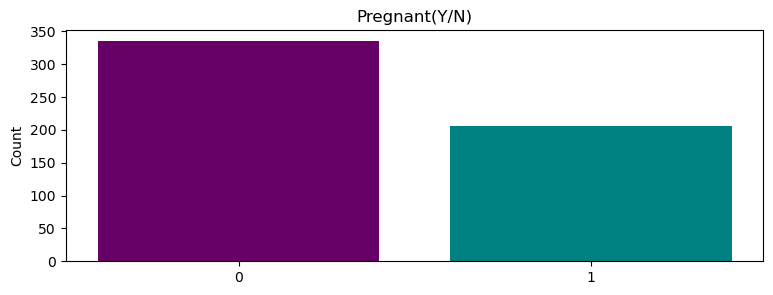

Pregnant(Y/N): 
 Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64


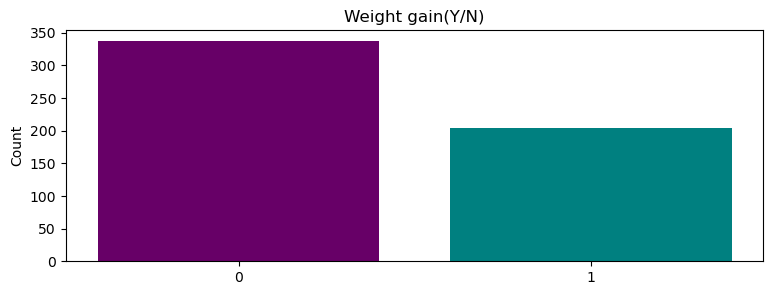

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


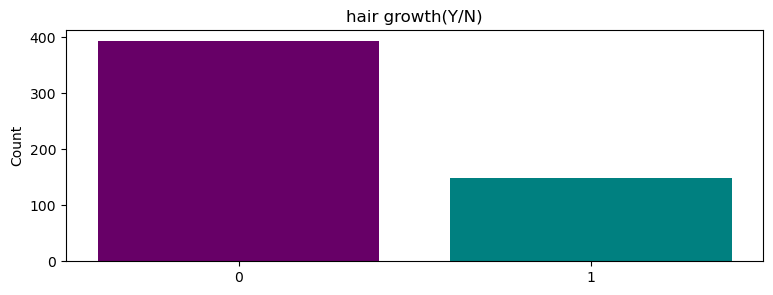

hair growth(Y/N): 
 hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64


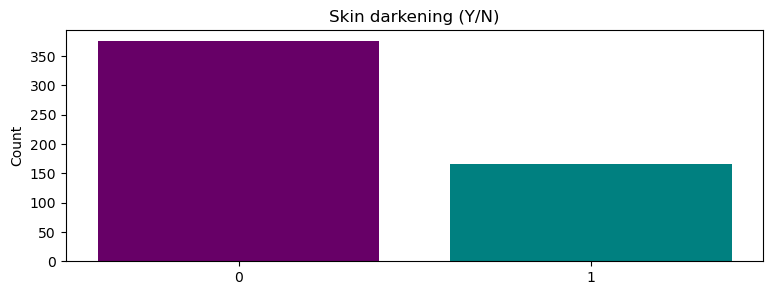

Skin darkening (Y/N): 
 Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64


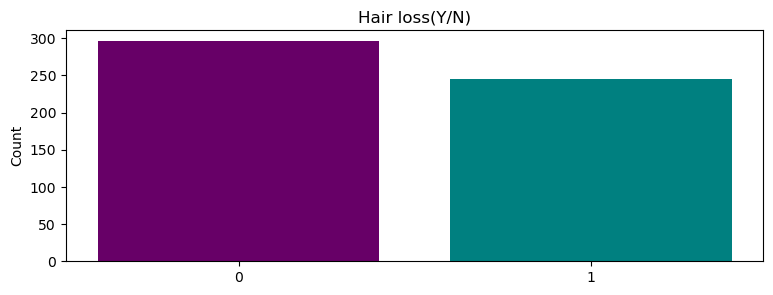

Hair loss(Y/N): 
 Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64


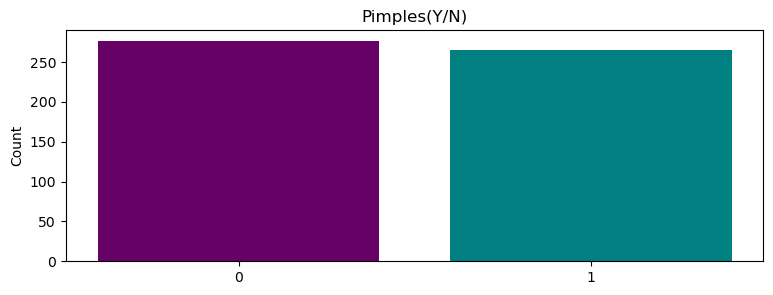

Pimples(Y/N): 
 Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64


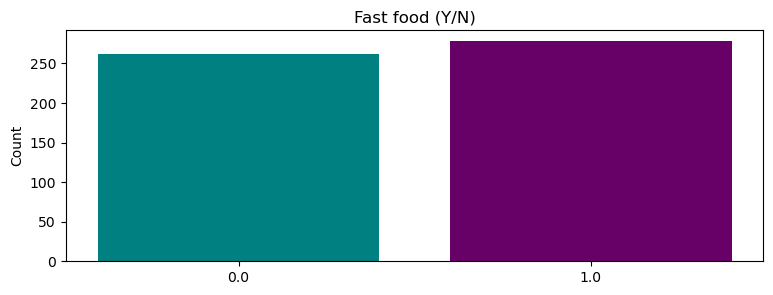

Fast food (Y/N): 
 Fast food (Y/N)
1.0    278
0.0    262
Name: count, dtype: int64


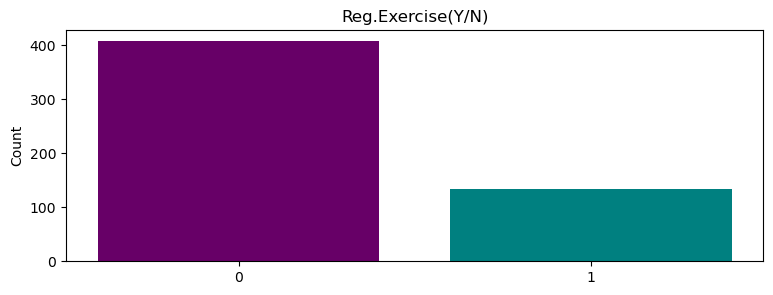

Reg.Exercise(Y/N): 
 Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64


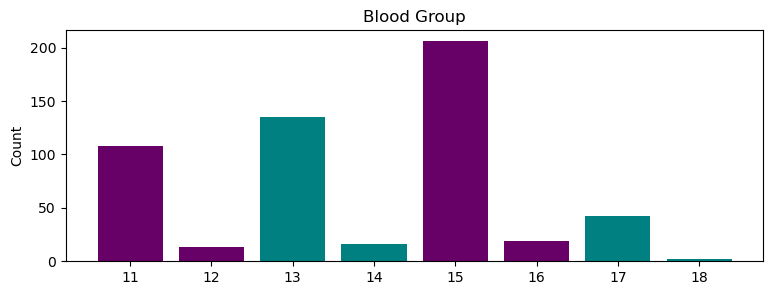

Blood Group: 
 Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64


In [96]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", 
            "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [97]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[0])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

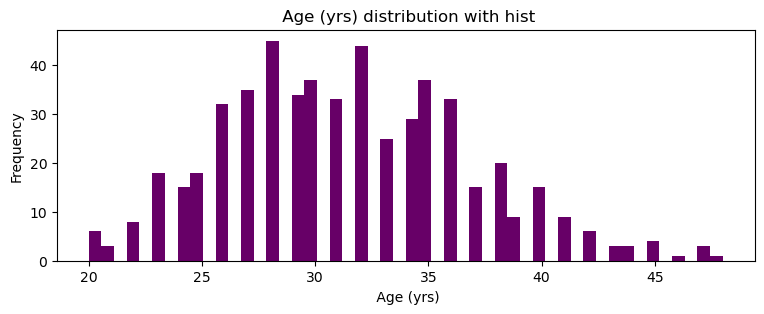

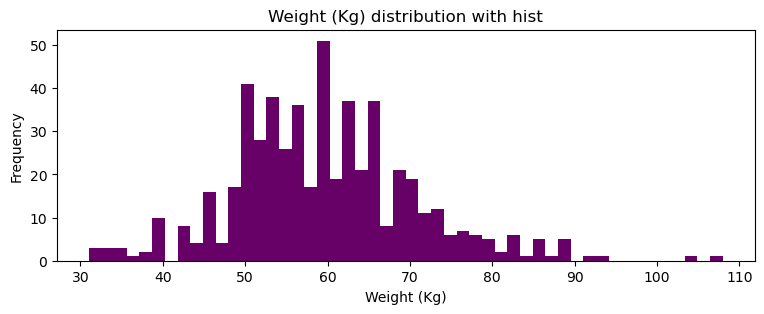

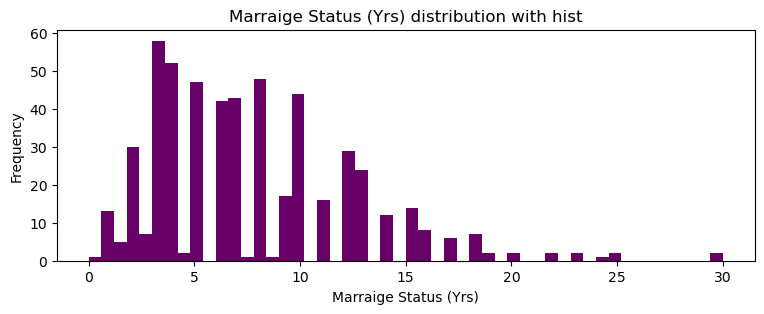

In [98]:
numericVar = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

Handling missing values

In [99]:
data.columns[data.isnull().any()]

Index(['BMI', 'Marraige Status (Yrs)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'AMH(ng/mL)', 'Fast food (Y/N)'],
      dtype='object')

In [100]:
#Filling missing values with the median value of the features.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)
data['FSH/LH'].fillna(data['FSH/LH'].median(),inplace=True)
data['Waist:Hip Ratio'].fillna(data['Waist:Hip Ratio'].median(),inplace=True)

In [101]:
data.isnull().sum()

Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [102]:
data[data["Cycle(R/I)"] == 5] 
data["Cycle(R/I)"].replace({5: 4}, inplace=True)
data ["Cycle(R/I)"].replace({2: 0, 4: 1}, inplace=True)

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,541.0,0.327172,0.469615,0.000,0.000,0.000,1.000,1.000
Age (yrs),541.0,31.430684,5.411006,20.000,28.000,31.000,35.000,48.000
Weight (Kg),541.0,59.637153,11.028287,31.000,52.000,59.000,65.000,108.000
Height(Cm),541.0,156.484835,6.033545,137.000,152.000,156.000,160.000,180.000
BMI,541.0,23.968577,2.447450,15.100,24.000,24.000,24.000,38.900
Blood Group,541.0,13.802218,1.840812,11.000,13.000,14.000,15.000,18.000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000,72.000,72.000,74.000,82.000
RR (breaths/min),541.0,19.243993,1.688629,16.000,18.000,18.000,20.000,28.000
Hb(g/dl),541.0,11.160037,0.866904,8.500,10.500,11.000,11.700,14.800
Cycle(R/I),541.0,0.279113,0.448978,0.000,0.000,0.000,1.000,1.000


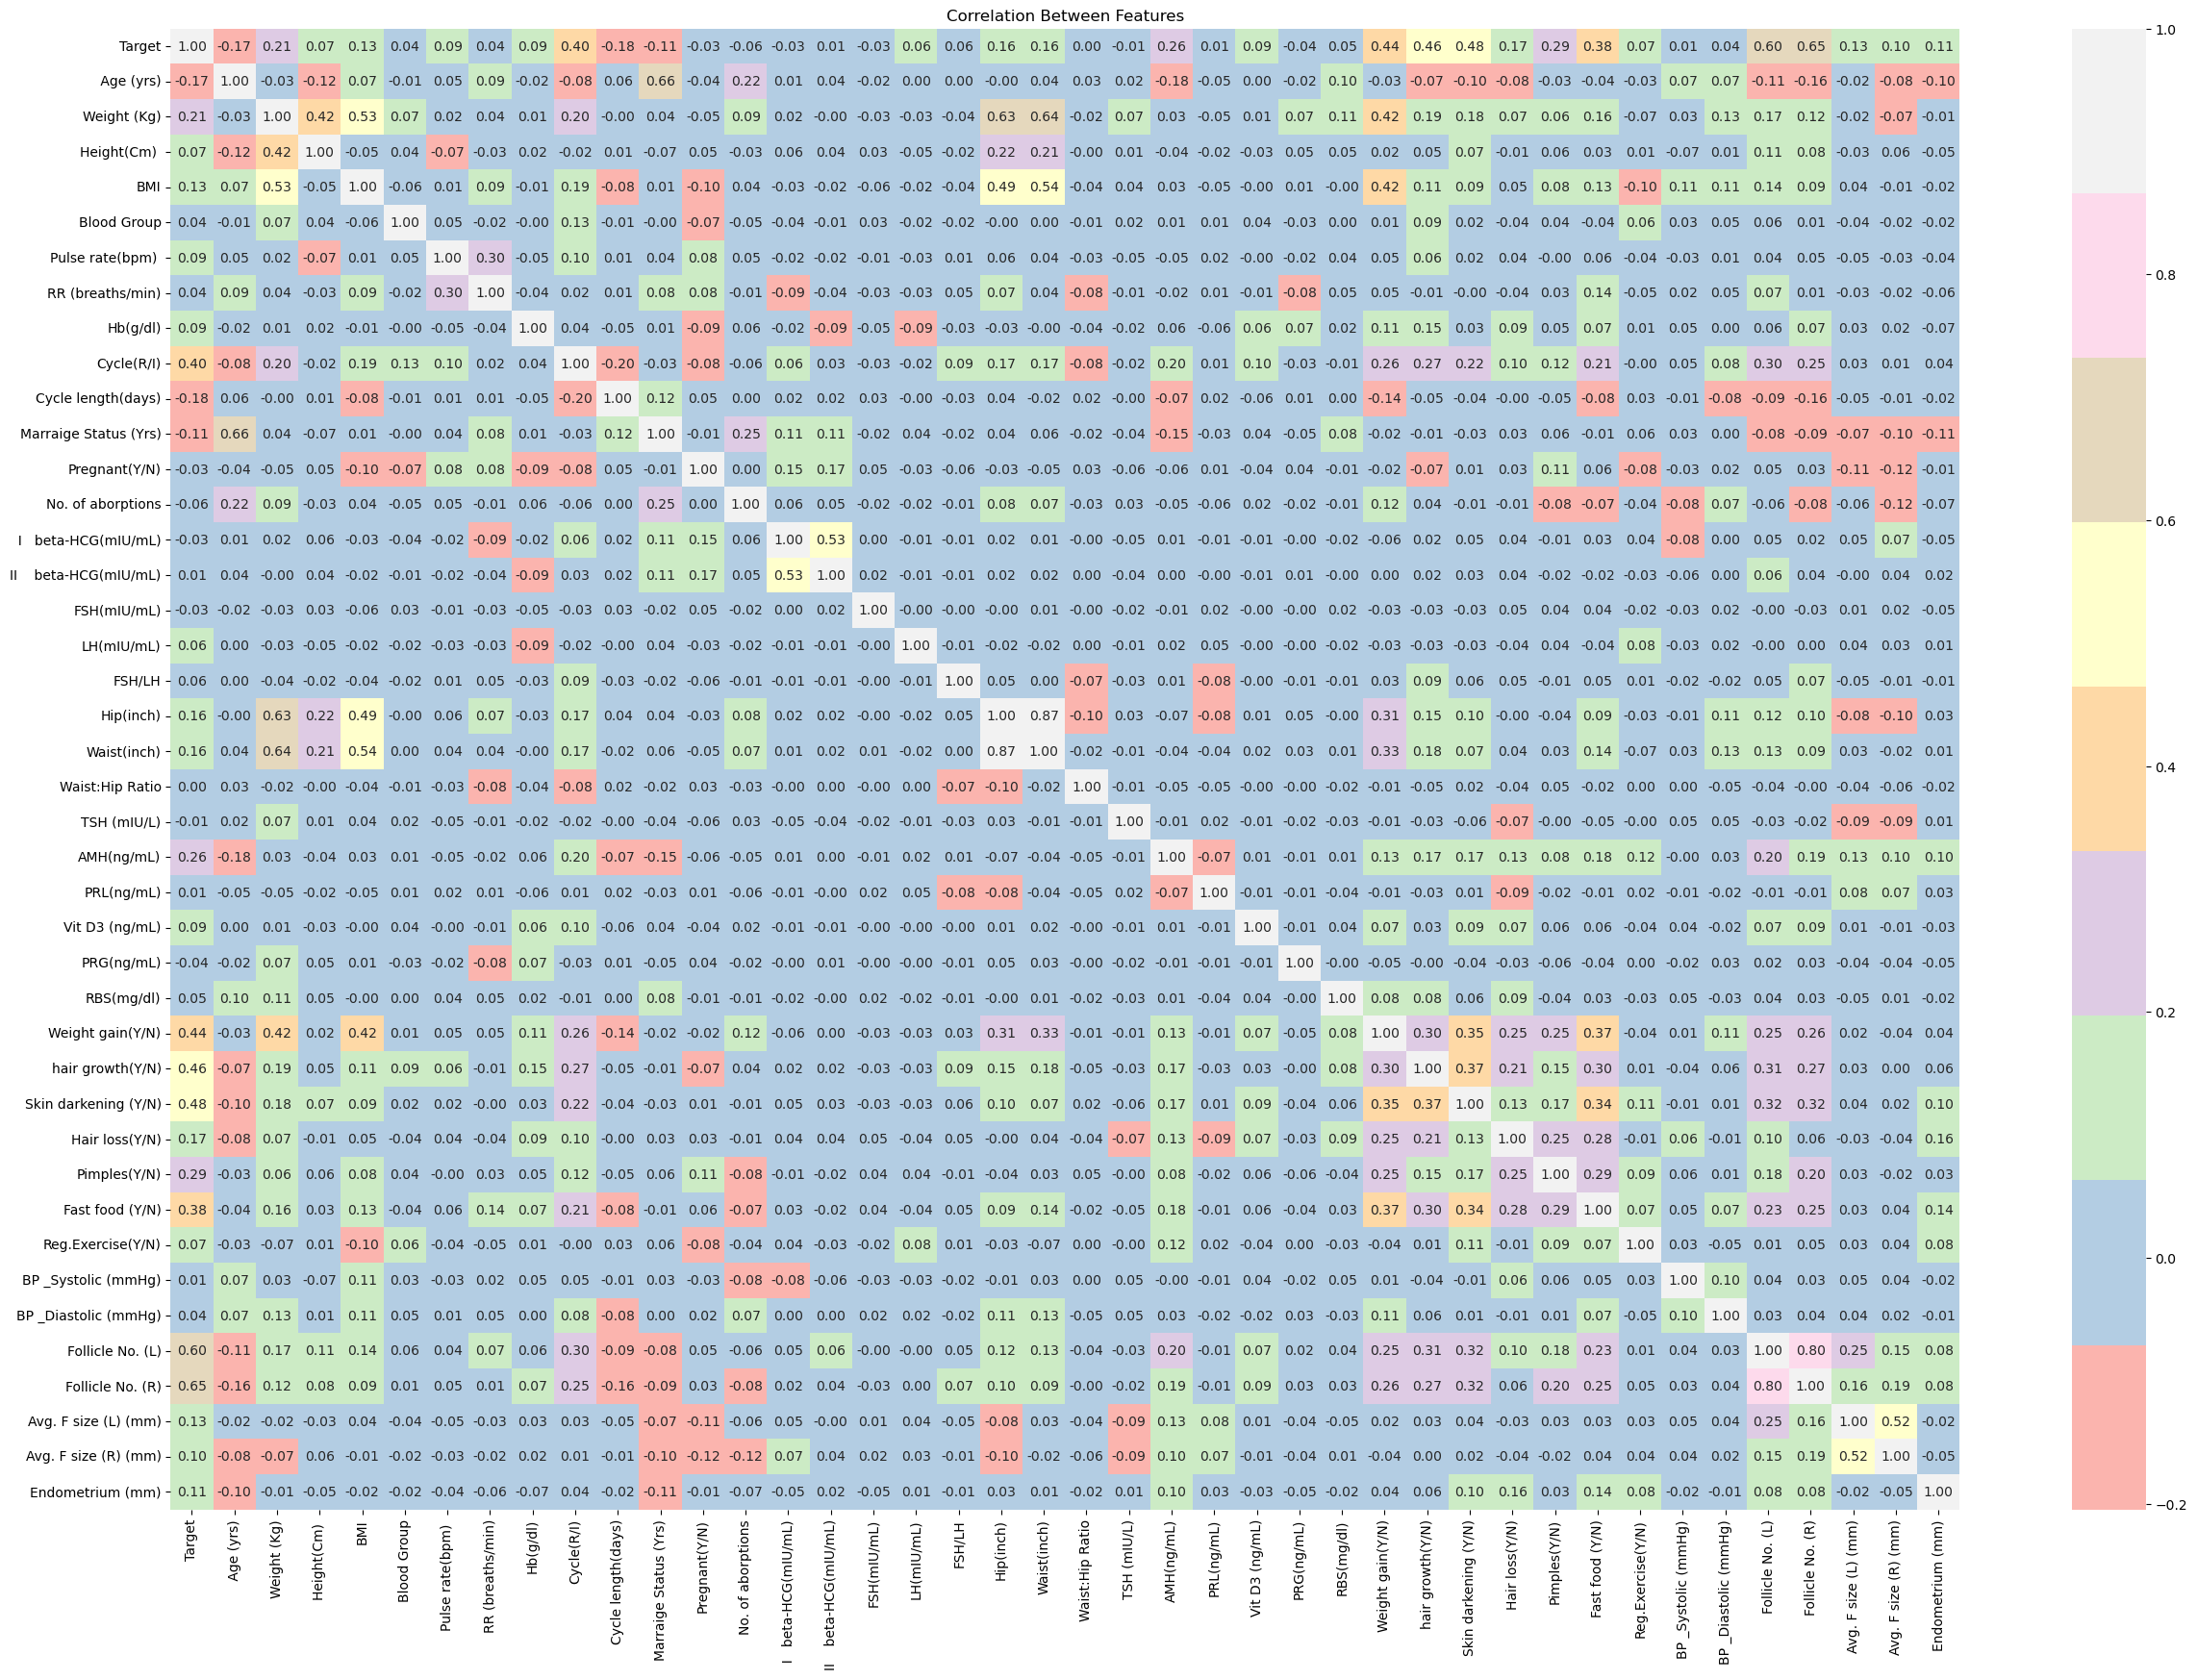

In [104]:
corr_matrix= data.corr()
plt.subplots(figsize=(30,20))
sns.heatmap(corr_matrix,cmap="Pastel1", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

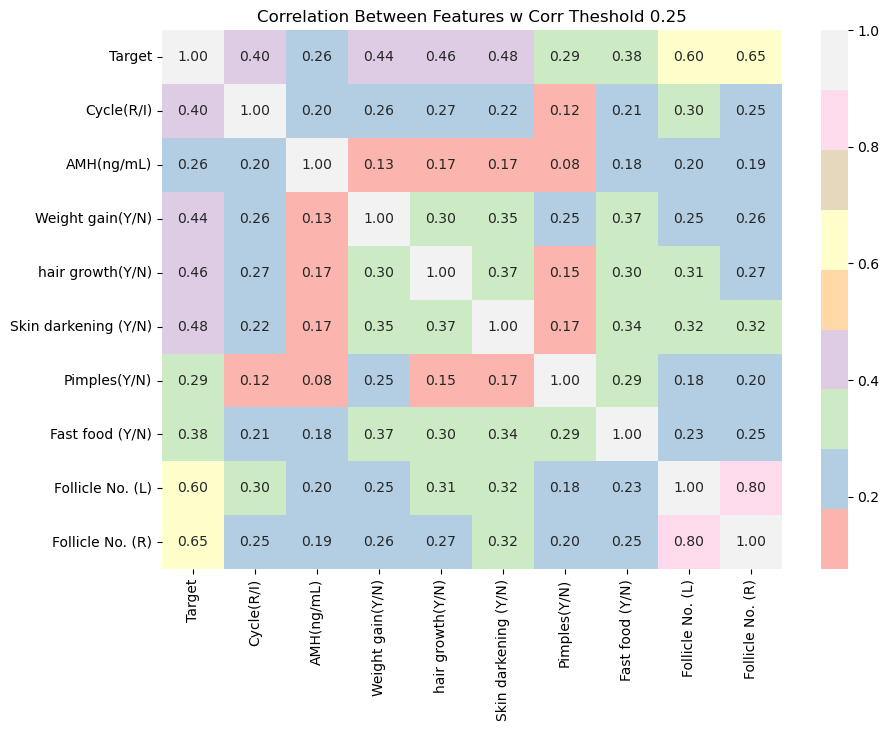

In [105]:
threshold = 0.25 
filtre = np.abs(corr_matrix["Target"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
plt.subplots(figsize=(10,7))
sns.heatmap(data[corr_features].corr(),cmap="Pastel1", annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.25")
plt.show()


In [106]:
X = data.drop(["Target"],axis=1)
y = data[["Target"]]

# from sklearn.feature_selection import SelectKBest, f_classif
# selector = SelectKBest(score_func=f_classif, k=9)  # Menyesuaikan jumlah fitur sesuai kebutuhan
# X_new = selector.fit_transform(X, y)

# # Menampilkan fitur yang dipilih
# selected_features = X.columns[selector.get_support()]
# print(f"Fitur yang dipilih: {selected_features.tolist()}")

In [114]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=9)
X_new = selector.fit_transform(X, y)

c:\Users\ellam\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Mutual Info Score': selector.scores_})
selected_features = feature_scores[selector.get_support()]

print("Skor Mutual Information setiap fitur:")
print(feature_scores.sort_values(by='Mutual Info Score', ascending=False))

print("\nFitur yang dipilih dan skornya:")
print(selected_features.sort_values(by='Mutual Info Score', ascending=False))

Skor Mutual Information setiap fitur:
                   Feature  Mutual Info Score
37        Follicle No. (R)           0.255394
36        Follicle No. (L)           0.204897
29    Skin darkening (Y/N)           0.130495
28        hair growth(Y/N)           0.123835
9       Cycle length(days)           0.091758
27        Weight gain(Y/N)           0.090828
22              AMH(ng/mL)           0.070974
8               Cycle(R/I)           0.069114
32         Fast food (Y/N)           0.064956
23              PRL(ng/mL)           0.062103
21             TSH (mIU/L)           0.044363
5         Pulse rate(bpm)            0.039153
30          Hair loss(Y/N)           0.035366
31            Pimples(Y/N)           0.032926
19             Waist(inch)           0.027214
16              LH(mIU/mL)           0.026062
10   Marraige Status (Yrs)           0.025699
33       Reg.Exercise(Y/N)           0.025464
0                Age (yrs)           0.023730
17                  FSH/LH           0.021

In [116]:
# Mengubah X_new menjadi DataFrame dengan nama kolom fitur yang dipilih
selected_feature_names = X.columns[selector.get_support()]
X_new_df = pd.DataFrame(X_new, columns=selected_feature_names)
# Menampilkan data dengan fitur yang dipilih
print("Dataset setelah seleksi fitur:")
print(X_new_df.head())

Dataset setelah seleksi fitur:
   Cycle(R/I)  Cycle length(days)  AMH(ng/mL)  Weight gain(Y/N)  \
0         0.0                 5.0        2.07               0.0   
1         0.0                 5.0        1.53               0.0   
2         0.0                 5.0        6.63               0.0   
3         0.0                 5.0        1.22               0.0   
4         0.0                 5.0        2.26               0.0   

   hair growth(Y/N)  Skin darkening (Y/N)  Fast food (Y/N)  Follicle No. (L)  \
0               0.0                   0.0              1.0               3.0   
1               0.0                   0.0              0.0               3.0   
2               0.0                   0.0              1.0              13.0   
3               0.0                   0.0              0.0               2.0   
4               0.0                   0.0              0.0               3.0   

   Follicle No. (R)  
0               3.0  
1               5.0  
2              15.0

C:\Users\ellam\AppData\Local\Temp\ipykernel_15156\3357856583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Mutual Info Score', data=feature_scores, palette='viridis')


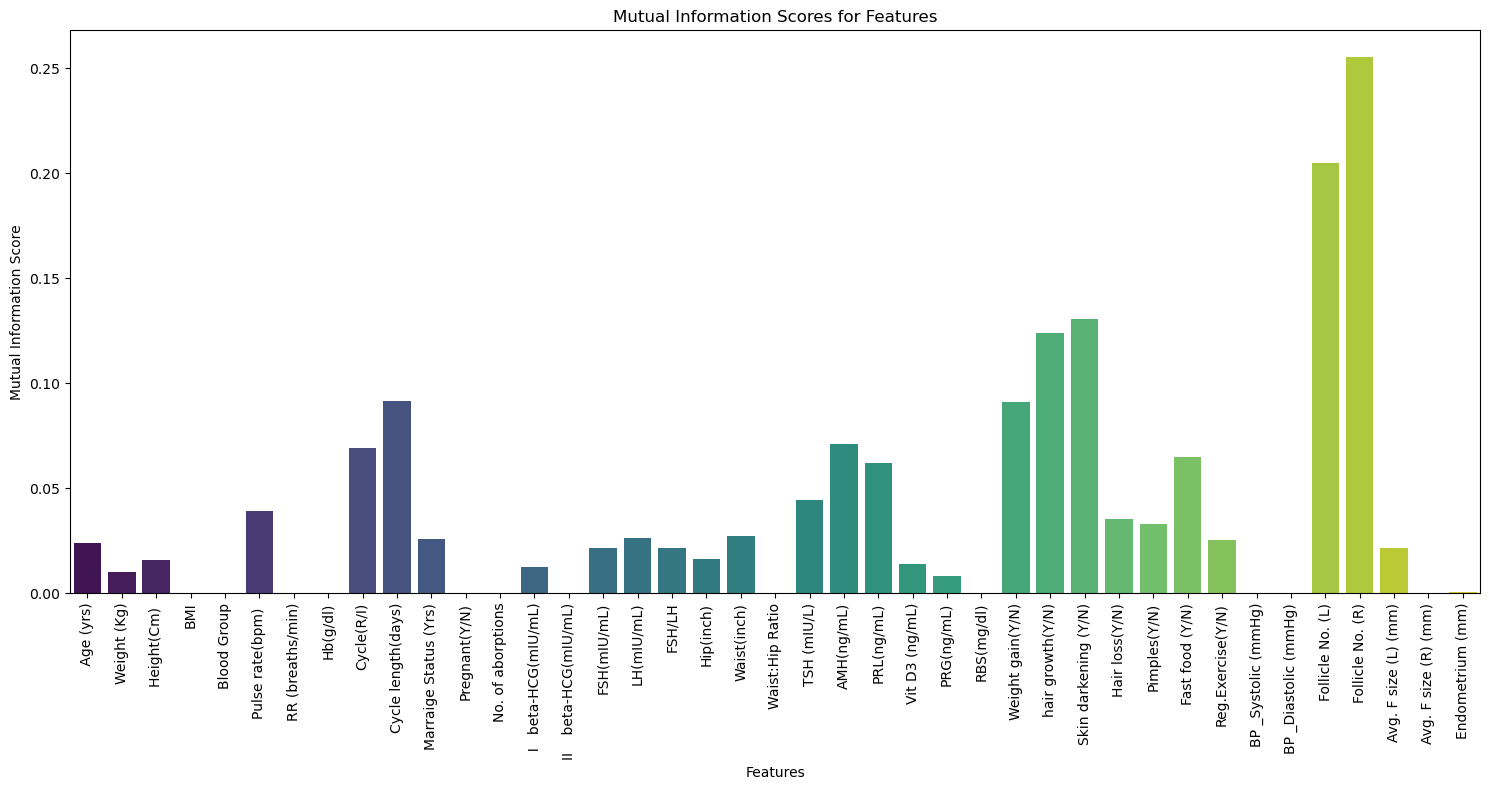

In [117]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Feature', y='Mutual Info Score', data=feature_scores, palette='viridis')
plt.title('Mutual Information Scores for Features')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

In [118]:
# feature_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA F-test Scores': selector.scores_})

# plt.figure(figsize=(15, 8))
# sns.barplot(x='Feature', y='ANOVA F-test Scores', data=feature_scores, palette='viridis')
# plt.title('ANOVA F-test Scores for Features')
# plt.xticks(rotation=90)
# plt.xlabel('Features')
# plt.ylabel('ANOVA F-test Scores')
# plt.tight_layout()
# plt.show()

In [119]:
combined_df = pd.concat([X_new_df, y], axis=1)
combined_df.head()

,Cycle(R/I),Cycle length(days),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Target
0,0.0,5.0,2.07,0.0,0.0,0.0,1.0,3.0,3.0,0
1,0.0,5.0,1.53,0.0,0.0,0.0,0.0,3.0,5.0,0
2,0.0,5.0,6.63,0.0,0.0,0.0,1.0,13.0,15.0,1
3,0.0,5.0,1.22,0.0,0.0,0.0,0.0,2.0,2.0,0
4,0.0,5.0,2.26,0.0,0.0,0.0,0.0,3.0,4.0,0


In [120]:
columns = combined_df.columns.tolist()
new_order = [columns[-1]] + columns[1:-1] + [columns[0]]
df = data[new_order]
df

,Target,Cycle length(days),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Cycle(R/I)
0,0,5,2.07,0,0,0,1.0,3,3,0
1,0,5,1.53,0,0,0,0.0,3,5,0
2,1,5,6.63,0,0,0,1.0,13,15,0
3,0,5,1.22,0,0,0,0.0,2,2,0
4,0,5,2.26,0,0,0,0.0,3,4,0
...,...,...,...,...,...,...,...,...,...,...
536,0,5,1.70,0,0,0,0.0,1,0,0
537,0,5,5.60,1,0,0,0.0,9,7,0
538,0,6,3.70,0,0,0,0.0,1,0,0
539,0,2,5.20,0,0,0,0.0,7,6,1


In [121]:
df.to_csv('../csv/clean_data_mutual.csv', index=False)

In [122]:
corr_features

['Target',
 'Cycle(R/I)',
 'AMH(ng/mL)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Follicle No. (L)',
 'Follicle No. (R)']

In [123]:
data = data[corr_features]
data.head()

,Target,Cycle(R/I),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
0,0,0,2.07,0,0,0,0,1.0,3,3
1,0,0,1.53,0,0,0,0,0.0,3,5
2,1,0,6.63,0,0,0,1,1.0,13,15
3,0,0,1.22,0,0,0,0,0.0,2,2
4,0,0,2.26,0,0,0,0,0.0,3,4


In [124]:
data.to_csv('../csv/clean_pcos_data.csv', index=False)

In [125]:
#Load data
df_inf = pd.read_csv("../csv/PCOS_infertility.csv")
df_woinf = pd.read_csv("../csv/PCOS_data.csv")

In [126]:
#Merge the files
data = pd.merge(df_woinf,df_inf, on='Patient File No.', suffixes=tuple({'','_wo'}),how='left')
#Drop repeated features
data =data.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo',
       'II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [127]:
#Change the title of the properties
data = data.rename(columns = {"PCOS (Y/N)":"Target"})
#Look at the merged data.
data.head() 

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,#NAME?,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,#NAME?,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,#NAME?,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,#NAME?,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [128]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl. No,541.0,271.000000,156.317519,1.000,136.00,271.00,406.00,541.00
Patient File No.,541.0,271.000000,156.317519,1.000,136.00,271.00,406.00,541.00
Target,541.0,0.327172,0.469615,0.000,0.00,0.00,1.00,1.00
Age (yrs),541.0,31.430684,5.411006,20.000,28.00,31.00,35.00,48.00
Weight (Kg),541.0,59.637153,11.028287,31.000,52.00,59.00,65.00,108.00
Height(Cm),541.0,156.484835,6.033545,137.000,152.00,156.00,160.00,180.00
Blood Group,541.0,13.802218,1.840812,11.000,13.00,14.00,15.00,18.00
Pulse rate(bpm),541.0,73.247689,4.430285,13.000,72.00,72.00,74.00,82.00
RR (breaths/min),541.0,19.243993,1.688629,16.000,18.00,18.00,20.00,28.00
Hb(g/dl),541.0,11.160037,0.866904,8.500,10.50,11.00,11.70,14.80


In [135]:
data[data["Cycle(R/I)"] == 5] 
data["Cycle(R/I)"].replace({5: 4}, inplace=True)
data ["Cycle(R/I)"].replace({2: 0, 4: 1}, inplace=True)

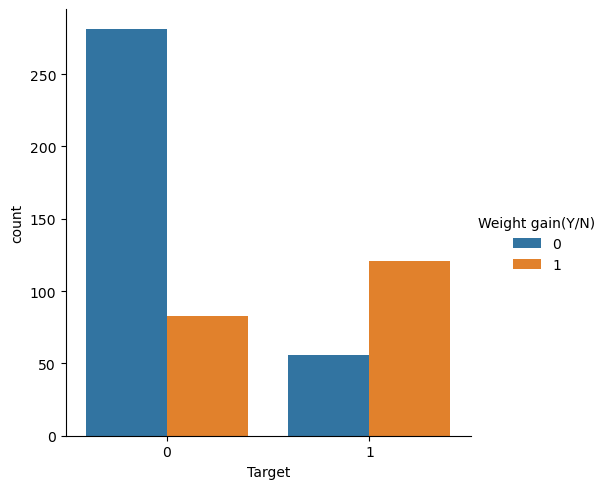

In [138]:
# Clustered bar plot
sns.catplot(x='Target', hue='Weight gain(Y/N)', kind='count', data=data)
plt.show()

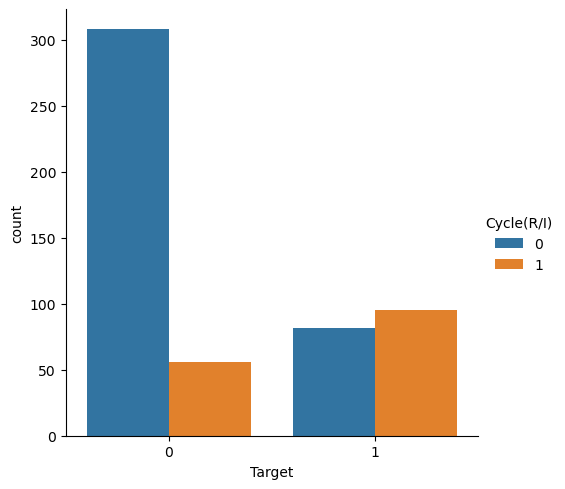

In [139]:
# Clustered bar plot
sns.catplot(x='Target', hue='Cycle(R/I)', kind='count', data=data)
plt.show()

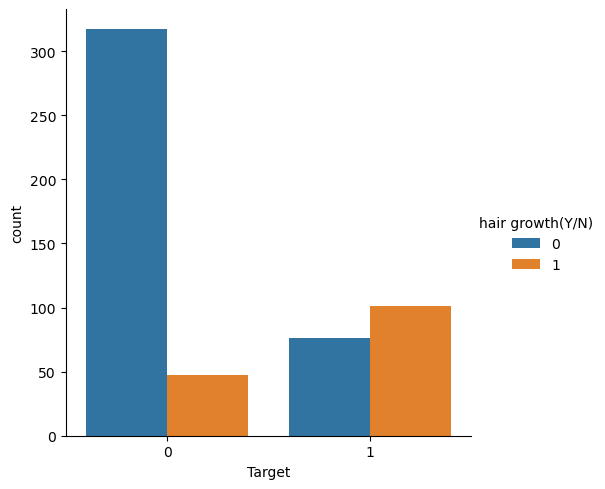

In [140]:
# Clustered bar plot
sns.catplot(x='Target', hue='hair growth(Y/N)', kind='count', data=data)
plt.show()

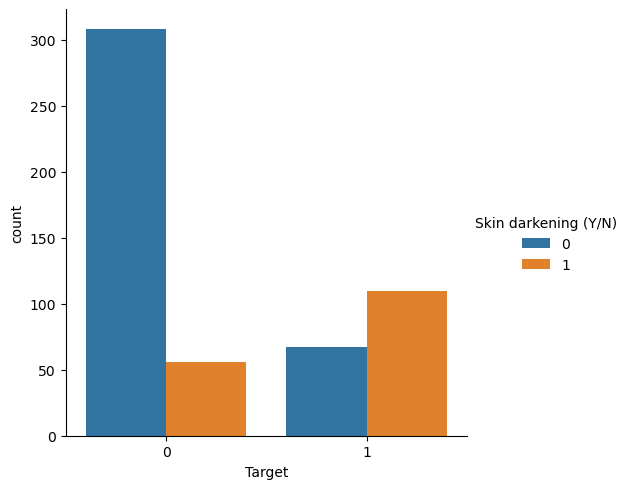

In [141]:
# Clustered bar plot
sns.catplot(x='Target', hue='Skin darkening (Y/N)', kind='count', data=data)
plt.show()

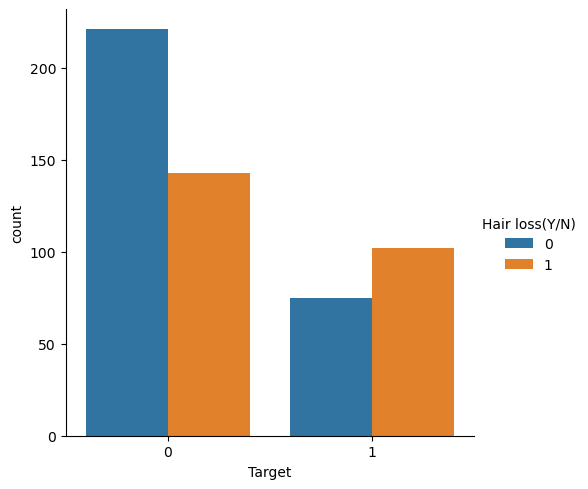

In [142]:
# Clustered bar plot
sns.catplot(x='Target', hue='Hair loss(Y/N)', kind='count', data=data)
plt.show()

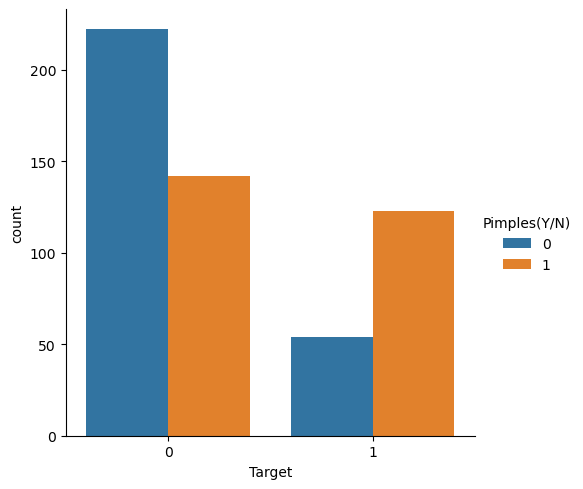

In [143]:

# Clustered bar plot
sns.catplot(x='Target', hue='Pimples(Y/N)', kind='count', data=data)
plt.show()

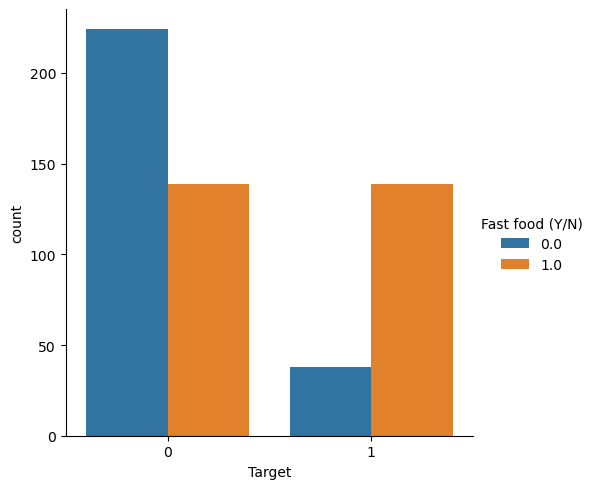

In [144]:
# Clustered bar plot
sns.catplot(x='Target', hue='Fast food (Y/N)', kind='count', data=data)
plt.show()

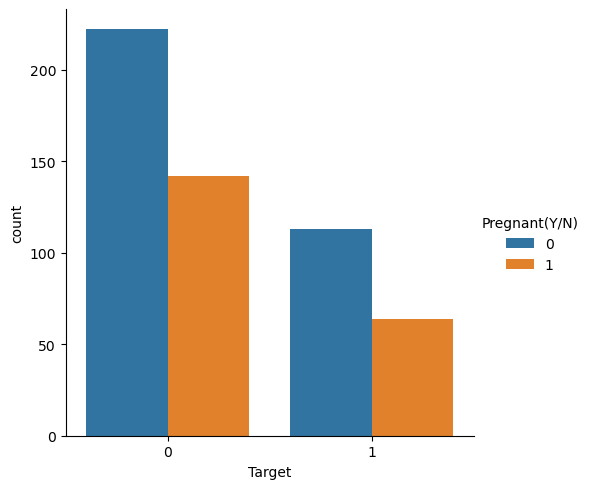

In [147]:

# Clustered bar plot
sns.catplot(x='Target', hue='Pregnant(Y/N)', kind='count', data=data)
plt.show()

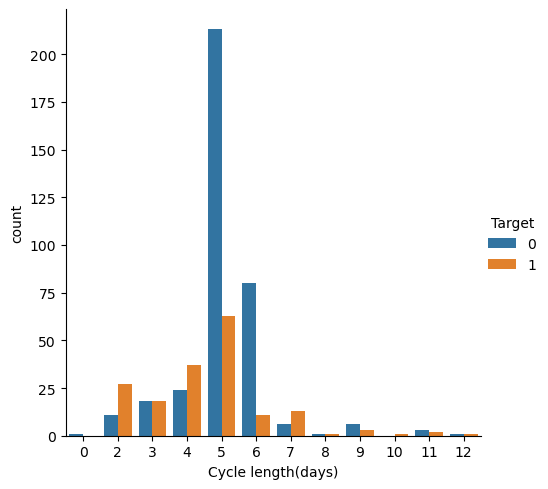

In [146]:
# Clustered bar plot
sns.catplot(x='Cycle length(days)', hue='Target', kind='count', data=data)
plt.show()